<a href="https://colab.research.google.com/github/CharlesPrado23/Notebooks/blob/main/TFKeras/Model(wine)Deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import utils

In [ ]:

from sklearn import datasets
wine = datasets.load_wine()
print(wine.data.shape)
len(wine.target_names)

(178, 13)


3

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2,random_state=20)

In [ ]:
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Dense(15, input_dim=wine.data.shape[1], activation='relu'))
model.add(Dense(10, input_dim=15, activation='relu'))
model.add(Dense(3, input_dim=10, activation='softmax'))


In [ ]:
from tensorflow.keras import optimizers
#hyper-parameters for optimizer
learning_rate = 0.001
opt = optimizers.Adam(lr=learning_rate)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['categorical_accuracy'])

# Train the model over 50 epochs using 10-observation batches and using the test holdout dataset for validation
num_epochs = 200
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=10,validation_split=0.1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
13/13 [==============================] - 14s 42ms/step - loss: 223.6925 - categorical_accuracy: 0.2352 - val_loss: 148.3223 - val_categorical_accuracy: 0.3333
Epoch 2/200
13/13 [==============================] - 0s 3ms/step - loss: 168.9065 - categorical_accuracy: 0.3026 - val_loss: 113.9415 - val_categorical_accuracy: 0.3333
Epoch 3/200
13/13 [==============================] - 0s 4ms/step - loss: 142.4457 - categorical_accuracy: 0.2151 - val_loss: 80.3997 - val_categorical_accuracy: 0.3333
Epoch 4/200
13/13 [==============================] - 0s 3ms/step - loss: 88.6629 - categorical_accuracy: 0.2633 - val_loss: 48.9823 - val_categorical_accuracy: 0.3333
Epoch 5/200
13/13 [==============================] - 0s 3ms/step - loss: 53.0791 - categorical_accuracy: 0.2617 - val_loss: 16.7379 - val_categorical_accuracy: 0.3333
Epoch 6/200
13/13 [==============================] - 0s 3ms/step - loss: 17.8116 - categorical_accuracy: 0.1747 - val_loss: 5.3451 - val_categorical_accuracy:

In [ ]:
eval = model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.0504 - categorical_accuracy: 0.9722


In [ ]:
import numpy as np

class_prob = model.predict(X_test)
#predictions = np.argmax(class_prob, axis=1)
class_prob = np.round(class_prob)
class_prob

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
class_prob

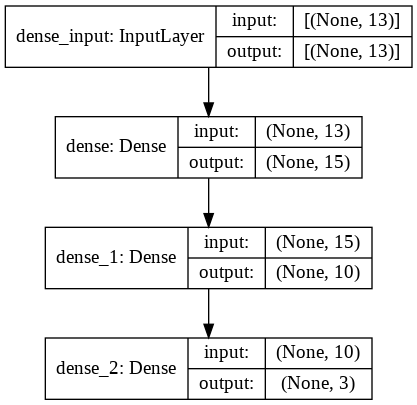

In [ ]:
utils.plot_model(model, "sequential_model.png", show_shapes=True)

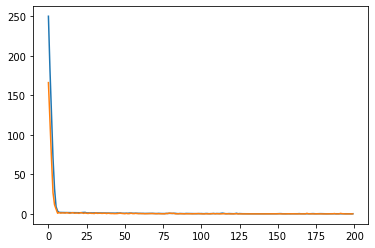

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
 multilabel_confusion_matrix(y_test, class_prob)

array([[[25,  1],
        [ 0, 10]],

       [[16,  3],
        [ 0, 17]],

       [[27,  0],
        [ 4,  5]]])